In [2]:
import pandas as pd
yelp_raw_data = pd.read_csv("../data/yelp.csv")
yelp_raw_data.head()


,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [3]:
yelp_raw_data.shape
# (10000,10)


(10000, 10)

In [4]:
type(yelp_raw_data)
# pandas.core.frame.DataFrame


pandas.core.frame.DataFrame

In [5]:
yelp_raw_data['business_id'] # grabs a single column of the Dataframe

0       9yKzy9PApeiPPOUJEtnvkg
1       ZRJwVLyzEJq1VAihDhYiow
2       6oRAC4uyJCsJl1X0WZpVSA
3       _1QQZuf4zZOyFCvXc0o6Vg
4       6ozycU1RpktNG2-1BroVtw
                 ...          
9995    VY_tvNUCCXGXQeSvJl757Q
9996    EKzMHI1tip8rC1-ZAy64yg
9997    53YGfwmbW73JhFiemNeyzQ
9998    9SKdOoDHcFoxK5ZtsgHJoA
9999    pF7uRzygyZsltbmVpjIyvw
Name: business_id, Length: 10000, dtype: object

In [6]:
type(yelp_raw_data['business_id'])
# pandas.core.series.Series


pandas.core.series.Series

In [7]:
yelp_raw_data['business_id'].describe()


count                      10000
unique                      4174
top       JokKtdXU7zXHcr20Lrk29A
freq                          37
Name: business_id, dtype: object

In [8]:
yelp_raw_data['review_id'].describe()

count                      10000
unique                     10000
top       fWKvX83p0-ka4JS3dc6E5A
freq                           1
Name: review_id, dtype: object

In [11]:
yelp_raw_data['text'].describe()['top']

'Great service'

In [12]:
duplicate_text = yelp_raw_data['text'].describe()['top']
text_is_the_duplicate = yelp_raw_data['text'] == duplicate_text

In [13]:
text_is_the_duplicate

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Name: text, Length: 10000, dtype: bool

In [14]:
sum(text_is_the_duplicate) # == 2

2

In [17]:
filtered_dataframe = yelp_raw_data[text_is_the_duplicate] # the filtered Dataframe
filtered_dataframe

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
284,Hf_MFIPi7ZiIWDQodJMzwg,2012-10-25,9l7FzgtZobP81lMwEQy4AA,5,Great service,review,9VmTOyq01oIUk5zuxOj1GA,0,0,1
3921,kkBMTNET2xgHCW-cnNwKxA,2012-12-21,M_GC_TG9TpSzMAUQ_TAimw,5,Great service,review,9VmTOyq01oIUk5zuxOj1GA,0,0,0


In [28]:
t = "This review is for the chain in general. The location we went to is new so it isn't in Yelp yet. Once it is I will put this review there as well. We were there on Friday at 5 PM. \n\nThe reason I gave it 2 stars is because the burger was very good and it was made the way I asked for it. My husbands burger was not.\n\nBut, the server and the fries left a lot to be desired. Let me preface by saying that we had been to several other locations. I like my fries crispy. I ask for them well done, extra crispy, scorched, tortured hollow tubes. Whatever their buzz word is for well done. The location will comply. EVERY OTHER 5 GUYS HAS COMPLIED. But not the one at TATUM AND SHEA. She said that corporate said they are not to cook the fries that way. So if we were to put up with soggy fries - yes soggy, then we did not want them. \n\nShe also interrupted us several times which is rude. THEN she went and called corporate just to double check for us and she came to the table and said they said no they were not to cook them that way. Seriously? We did not ask for her to do this. She actually accused us of being undercover shoppers. We started to say something and then again- she interupted.\n\nListen, if you explain that our choice is not how the company wishes to present their product and we still choose to have them a different way, you should comply. It is after all our money and our decision. I was raised with the rules that #1 the customer is always right. And #2 if the customer is wrong REFER TO RULE NUMBER 1!!\n\nWe will not return. They have lost our business and I hope she loses her job.\nIf you want to try a really good burger AND FRIES place- go to Paradise Valley Burger Company at 40th Street and Bell. You will not be disappointed."
yelp_raw_data[yelp_raw_data['text'] == t]

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
4372,jvvh4Q00Hq2XyIcfmAAT2A,2012-06-16,ivGRamFF3KurE9bjkl6uMw,2,This review is for the chain in general. The l...,review,KLekdmo4FdNnP0huUhzZNw,0,0,0
9680,rIonUa02zMz_ki8eF-Adug,2012-06-16,mutQE6UfjLIpJ8Wozpq5UA,2,This review is for the chain in general. The l...,review,KLekdmo4FdNnP0huUhzZNw,0,0,0


In [29]:
yelp_raw_data['type'].describe()

count      10000
unique         1
top       review
freq       10000
Name: type, dtype: object

In [30]:
yelp_raw_data['user_id'].describe()

count                      10000
unique                      6403
top       fczQCSmaWF78toLEmb0Zsw
freq                          38
Name: user_id, dtype: object

In [31]:
yelp_raw_data['stars'].describe()

count    10000.000000
mean         3.777500
std          1.214636
min          1.000000
25%          3.000000
50%          4.000000
75%          5.000000
max          5.000000
Name: stars, dtype: float64

In [32]:
yelp_raw_data['stars'].value_counts()

stars
4    3526
5    3337
3    1461
2     927
1     749
Name: count, dtype: int64

<Axes: xlabel='stars'>

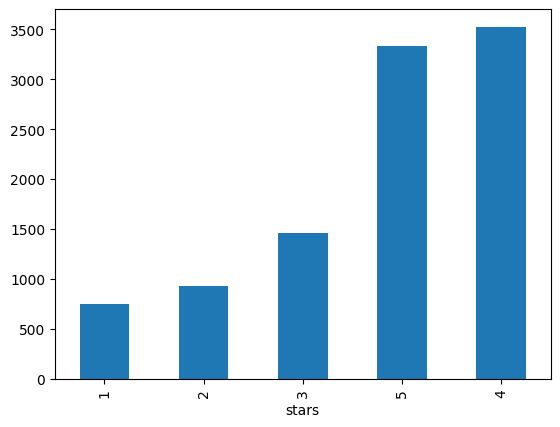

In [79]:
import datetime
dates = yelp_raw_data['stars'].value_counts()
dates = dates.sort_values()
dates.plot(kind='bar')

In [70]:
titanic = pd.read_csv('../data/short_titanic.csv')
titanic.head()

,Pclass,Survived,Sex,Age,Embarked
0,3,0,male,22.0,S
1,1,1,female,38.0,C
2,3,1,female,26.0,S
3,1,1,female,35.0,S
4,3,0,male,35.0,S


In [72]:
titanic.shape

(891, 5)

In [73]:
import numpy as np
titanic['Sex'] = np.where(titanic['Sex']=='female', 1, 0)

titanic['Sex']

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    1
889    0
890    0
Name: Sex, Length: 891, dtype: int64

In [74]:
titanic.describe()

,Pclass,Survived,Sex,Age
count,891.000000,891.000000,891.000000,714.000000
mean,2.308642,0.383838,0.352413,29.699118
std,0.836071,0.486592,0.477990,14.526497
min,1.000000,0.000000,0.000000,0.420000
25%,2.000000,0.000000,0.000000,20.125000
50%,3.000000,0.000000,0.000000,28.000000
75%,3.000000,1.000000,1.000000,38.000000
max,3.000000,1.000000,1.000000,80.000000


In [75]:
titanic.isnull().sum()

Pclass        0
Survived      0
Sex           0
Age         177
Embarked      2
dtype: int64

In [76]:
print(sum(titanic['Age'].isnull())) # == 177 missing values average_age

average_age = titanic['Age'].mean()
titanic['Age'].fillna(average_age, inplace = True) #use the fillna method to remove null values
print(sum(titanic['Age'].isnull())) # == 0 missing values

titanic.isnull().sum()

177
0


Pclass      0
Survived    0
Sex         0
Age         0
Embarked    2
dtype: int64

In [77]:
titanic.groupby('Sex')['Age'].mean()

Sex
0    30.505824
1    28.216730
Name: Age, dtype: float64